In [1]:
import geopandas as gpd
import shapefile as shp
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import rtree
dates = ['201101', '201104', '201107', '201110', 
       '201201', '201204', '201207', '201210', '201301', '201304', '201307', '201310', '201401', '201404', '201407',
       '201410', '201501', '201504', '201507', '201510', '201602', '201606','201610',
       '201706', '201710', '201802', '201806', '201810', '201812','201902', '201906', '201910']

In [2]:
# Import shapefiles and compile into single dataframe

In [3]:
df = gpd.GeoDataFrame()
for d in dates:
    shapefile = '../../FEWSNET/East Africa/EA_'+d+'_CS.shp'
    #Read shapefile using Geopandas
    gdf = gpd.read_file(shapefile)
    gdf['date'] = pd.to_datetime(d, format='%Y%m')
    df = df.append(gdf, ignore_index=True)
    
print(df.head())

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


     CS  HA0       date                                           geometry
0   1.0  NaN 2011-01-01  MULTIPOLYGON (((40.42789 -10.38034, 40.42349 -...
1   2.0  NaN 2011-01-01  MULTIPOLYGON (((38.71498 -9.92198, 38.71804 -9...
2   3.0  NaN 2011-01-01  MULTIPOLYGON (((45.15000 3.21000, 45.27000 3.2...
3   4.0  NaN 2011-01-01  MULTIPOLYGON (((42.57957 -0.31284, 42.57124 -0...
4  88.0  NaN 2011-01-01  MULTIPOLYGON (((29.67210 -0.88200, 29.67230 -0...


In [5]:
df['fewsnet_area'] = df.area

In [5]:
# Import Ethiopia Admin 2 Shapefile

In [6]:
ethiopia = gpd.read_file('ET_Admin2_2014/ET_Admin2_2014.shp')
ethiopia['admin_2_area'] = ethiopia.area


In [12]:
# Combine two dataframes
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [13]:
#combined = gpd.sjoin(ethiopia, df, how="inner", op='intersects')
combined = gpd.overlay(ethiopia, df, how='intersection')
combined.head()

KeyboardInterrupt: 

In [14]:
combined['intersection'] = combined.area
combined

,FNID,EFF_YEAR,COUNTRY,ADMIN0,ADMIN1,ADMIN1FR,ADMIN1SP,ADMIN1PT,ADMIN2,ADMIN2FR,ADMIN2SP,ADMIN2PT,ALIASES,admin_2_area,CS,HA0,date,fewsnet_area,geometry,intersection
0,ET2014A20722,2014,ET,Ethiopia,SNNPR,None,None,None,Segen,None,None,None,None,0.552,2.000,1.000,2018-06-01,47.072,"POLYGON ((37.05237 5.37489, 37.06189 5.38448, ...",0.433
1,ET2014A20411,2014,ET,Ethiopia,Oromia,None,None,None,Bale,None,None,None,None,4.471,2.000,1.000,2018-06-01,47.072,"MULTIPOLYGON (((41.52576 7.95226, 41.52766 7.9...",3.317
2,ET2014A20412,2014,ET,Ethiopia,Oromia,None,None,None,Borena,None,None,None,None,4.269,2.000,1.000,2018-06-01,47.072,"MULTIPOLYGON (((38.07850 5.69360, 38.08324 5.7...",0.001
3,ET2014A20508,2014,ET,Ethiopia,Somali,None,None,None,Afder,None,None,None,~Afdheer~Afdher~Afdier~,5.039,2.000,1.000,2018-06-01,47.072,"MULTIPOLYGON (((45.00141 4.93747, 45.00141 4.9...",0.001
4,ET2014A20408,2014,ET,Ethiopia,Oromia,None,None,None,Arsi,None,None,None,~Arssi~,1.720,2.000,1.000,2018-06-01,47.072,"POLYGON ((40.22548 8.55971, 40.23038 8.56249, ...",0.139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5951,ET2014A20603,2014,ET,Ethiopia,Benshangul Gumuz,None,None,None,Asosa,None,None,None,~Assosa~,0.935,3.000,1.000,2018-12-01,7.546,"MULTIPOLYGON (((34.94003 10.86683, 34.94028 10...",0.000
5952,ET2014A20604,2014,ET,Ethiopia,Benshangul Gumuz,None,None,None,Kemashi,None,None,None,~Kamashi~,0.831,3.000,1.000,2018-12-01,7.546,"MULTIPOLYGON (((35.00305 11.15078, 35.00305 11...",0.000
5953,ET2014A20602,2014,ET,Ethiopia,Benshangul Gumuz,None,None,None,Metekel,None,None,None,~Metikal~,2.077,3.000,1.000,2018-12-01,7.546,"MULTIPOLYGON (((34.98164 11.20881, 34.98164 11...",0.000
5954,ET2014A20602,2014,ET,Ethiopia,Benshangul Gumuz,None,None,None,Metekel,None,None,None,~Metikal~,2.077,1.000,0.000,2018-12-01,100.066,"MULTIPOLYGON (((35.25879 11.92249, 35.26541 11...",0.000


In [44]:
combined['proportion'] = (combined['intersection']/combined['fewsnet_area'])*100
test = combined.loc[combined['proportion']>1]

In [45]:
#test = combined

In [46]:
converted = test[['ADMIN0', 'ADMIN1', 'ADMIN2','date','CS', 'proportion']]
converted = converted.drop_duplicates()
converted.sort_values('ADMIN2')
#converted.head(n=100)

,ADMIN0,ADMIN1,ADMIN2,date,CS,proportion
3948,Ethiopia,Somali,Afder,2017-10-01,3.000,6.876
407,Ethiopia,Somali,Afder,2015-10-01,2.000,2.217
3770,Ethiopia,Somali,Afder,2015-07-01,2.000,9.001
4086,Ethiopia,Somali,Afder,2018-02-01,3.000,9.786
4069,Ethiopia,Somali,Afder,2018-02-01,3.000,1.941
...,...,...,...,...,...,...
1109,Ethiopia,Tigray,West Tigray,2018-10-01,1.000,2.255
1108,Ethiopia,Oromia,West Wellega,2018-10-01,1.000,2.067
2238,Ethiopia,SNNPR,Wolayita,2013-04-01,3.000,1.233
3762,Ethiopia,SNNPR,Wolayita,2016-10-01,1.000,6.928


In [33]:
converted.loc[converted['ADMIN2']=='Afder']

,ADMIN0,ADMIN1,ADMIN2,date,CS,geometry
3,Ethiopia,Somali,Afder,2018-06-01,2.000,"MULTIPOLYGON (((45.00141 4.93747, 45.00141 4.9..."
38,Ethiopia,Somali,Afder,2012-01-01,3.000,"POLYGON ((42.00631 6.60056, 42.03254 6.58923, ..."
85,Ethiopia,Somali,Afder,2019-06-01,2.000,"MULTIPOLYGON (((45.00141 4.93747, 45.00141 4.9..."
144,Ethiopia,Somali,Afder,2012-01-01,2.000,"MULTIPOLYGON (((45.00141 4.93747, 45.00141 4.9..."
209,Ethiopia,Somali,Afder,2013-07-01,2.000,"MULTIPOLYGON (((45.00141 4.93747, 45.00141 4.9..."
...,...,...,...,...,...,...
5667,Ethiopia,Somali,Afder,2013-10-01,3.000,"MULTIPOLYGON (((43.13573 5.64012, 43.13574 5.6..."
5680,Ethiopia,Somali,Afder,2018-02-01,1.000,"MULTIPOLYGON (((44.59088 4.93483, 44.58756 4.9..."
5681,Ethiopia,Somali,Afder,2017-06-01,4.000,"POLYGON ((42.73475 5.74519, 42.73495 5.74480, ..."
5687,Ethiopia,Somali,Afder,2018-06-01,1.000,"POLYGON ((42.40130 4.19305, 42.38411 4.19101, ..."


In [34]:
# Import population data

In [47]:
eth_pop = pd.read_csv('eth_admpop_adm2_2020.csv')
eth_pop.head()

,admin2Name_en,admin2Pcode,admin1Name_en,admin1Pcode,admin0Name_en,admin0Pcode,Total,Male,Female,T_00_17,T_18_60,T_60plus
0,Afder,ET0508,Somali,ET05,Ethiopia,ET,654828,352416,302413,347059,276010,31759
1,Agnewak,ET1202,Gambela,ET12,Ethiopia,ET,164054,83695,80359,86948,69149,7957
2,Alle,ET0712,SNNP,ET07,Ethiopia,ET,81190,40595,40595,43031,34221,3938
3,Amaro,ET0721,SNNP,ET07,Ethiopia,ET,195252,97626,97626,103484,82299,9470
4,Arsi,ET0408,Oromia,ET04,Ethiopia,ET,3645492,1829539,1815952,1932111,1536575,176806


In [48]:
converted = converted.merge(eth_pop[['admin2Name_en', 'Total']], how='left', left_on='ADMIN2', right_on='admin2Name_en')
converted.head()

,ADMIN0,ADMIN1,ADMIN2,date,CS,proportion,admin2Name_en,Total
0,Ethiopia,Oromia,Bale,2018-06-01,2.000,7.046,Bale,1887498.000
1,Ethiopia,Somali,Jarar,2018-06-01,2.000,4.332,Jarar,641077.000
2,Ethiopia,Somali,Korahe,2018-06-01,2.000,3.169,Korahe,511890.000
3,Ethiopia,Somali,Sitti,2018-06-01,2.000,5.277,NaN,nan
4,Ethiopia,Amhara,South Wollo,2018-06-01,2.000,1.102,NaN,nan


In [49]:
converted['population'] = converted['Total']*(converted['proportion']/100)

In [50]:
converted = converted.loc[converted['ADMIN2'].astype(str)!='nan']
grouped_2 = converted[['date', 'CS', 'ADMIN2', 'population']].groupby(['date', 'ADMIN2', 'CS']).agg('sum').reset_index()
grouped_2.head()

,date,ADMIN2,CS,population
0,2011-01-01,Afder,3.000,52352.272
1,2011-01-01,Agniwak,2.000,0.000
2,2011-01-01,Awusi,3.000,0.000
3,2011-01-01,Bale,3.000,102699.172
4,2011-01-01,Borena,3.000,32075.919


In [112]:
def return_max_cs(date, admin2, df):
    sub = df.loc[(df['date']==date)&(df['ADMIN2']==admin2)]
    #print(sub)
    mx = sub['area'].max()
    print(mx)
    row = sub[['date', 'ADMIN2', 'CS', 'Total']].loc[sub['area']==mx]
    return row

In [113]:
return_max_cs('2011-01-01', 'Afder', converted)

5.038826686117523


,date,ADMIN2,CS,Total
1240,2011-01-01,Afder,3.000,654828.000


In [114]:
new_df = pd.DataFrame(columns=['date', 'ADMIN2', 'CS', 'Total'])
for d in converted['date'].unique():
    for a in converted['ADMIN2'].unique():
        row = return_max_cs(d, a, converted)
        new_df = new_df.append(row)

print(new_df)

0.43252483891845483
3.3169531192950985
2.9427287315525072
5.038030615132253
1.3916604271430772
0.45603622099391855
2.0391750007159657
0.08665019494011612
0.9737305871939747
0.9415241312161008
0.7795637566661001
0.988873967182139
1.4915733158078903
2.948706096793655
0.58475415954168
2.4839977106065083
0.6900242608472561
1.574558278621574
0.904676653090766
0.8447526183738153
0.7439792951902716
0.6127973046614629
0.9091039079357254
1.1517633326448637
2.7643285305677776
1.32819258774502
0.8919123928666879
1.459282052782511
0.9511073845507217
1.320255192302516
0.4534355424182327
2.439030834183144
2.457849360072836
1.1614252205079507
4.360824341726552
0.03412383793404073
1.558455327992125
0.06994915552039406
0.860074253893037
0.19198889608074485
0.3931831337924146
0.3113539694504867
0.025448696490527327
0.44469853232612044
0.24737051570400745
1.9052499434446009
0.9350793193938582
0.8313836055439541
2.0766045246639835
0.552370550743094
0.07012826882916087
0.35803417465489545
0.697443904383985

0.8915533605815545
2.7081925394270554
0.9511073845507505
1.2282976758207407
0.3684040118930731
2.0028873604491206
2.399470268517027
1.161721673979578
4.36216957657805
0.03393180631069511
1.5582362106950178
0.10847207865628361
0.8600742538930266
0.19232664296753862
0.3931831337924091
0.3114639806977804
0.025590171964737937
0.44572222409854884
0.247370515703951
1.9052499434444872
0.9350793193938323
0.8313836055439301
2.076604524725492
0.36172390503550034
0.06991407360095135
0.1858133318358079
0.569477667286577
0.34824980814067685
0.030518807239020777
1.276597858214162
1.5030755157736477
0.06560581232438872
0.7759961065377922
0.849519180509618
1.056063603212801
0.36459616403934847
0.06143228281944308
0.5383361382942078
0.29889134414734037
0.16747625856404288
0.7407768600256309
0.17992525565548392
1.1470266770997108
0.6662635985076631
1.256826350652205
1.1009024589895615
0.19198220160430993
0.0482372613788499
0.04500007904232288
0.043874974718452864
0.5443317075309517
4.468990392741786
2.6

0.42619772734436595
2.076085458412499
0.2792626681269478
0.06901109056129902
0.3562499503101357
0.30001882465928054
0.4158768852335935
0.029641712871191613
1.2746353755086193
1.5029704740376735
0.07303228240431613
0.6061186418943169
0.9685140812518952
1.047819438076871
0.35678752147735887
0.06146343437908052
0.537075966156869
0.17366824165388675
0.12906832977415233
0.7407768600256309
0.17893890882922306
1.1457183123050338
0.6662635985076631
1.256407192881794
1.1009024592485108
0.19198220160430993
0.0482372613788499
0.04500007904232288
0.04435937237723894
0.4229442033445223
3.222858211091107
2.9433831769274614
5.038030615144026
1.2667292502136336
0.6466117823075498
3.2571205564631427
0.07945657210979731
1.0015288920877512
0.8614329657844751
0.7797457513669572
0.9908658218662387
2.6305493507321973
1.6293409363031375
0.7722144767594037
2.484872474470229
0.7962421849582736
1.2026434762520941
1.279050572459518
0.45371800006139856
0.743154283304159
0.6147710486330785
0.7405167207486849
1.152

0.2992535086637022
0.21161300405906686
0.7407768600256309
0.17992525565548587
1.146187160669823
0.6662635985076631
1.2568515594902907
1.1007426796786361
0.19198220160430993
0.0482372613788499
0.04500007904232288
0.04435937237723894
0.5443888962704693
4.470573845407211
4.149580311996579
5.038826686371355
1.7106557162777967
0.8764159562247203
3.257953607375537
0.08678228309565551
1.1774721801968877
0.9423194748470436
1.5237464994570462
0.9916691692717088
2.63518182804633
2.948712386711872
1.0141291656568137
2.486735627289165
1.1733727735126864
1.8047734530537
1.4248111611580498
0.8453732320355861
0.7442344591024338
0.971997234369123
1.4344247101373635
1.152827481458015
2.766119650245629
1.3292710883736027
0.8926266012841064
2.708506054972691
1.1820786816266091
2.0549057778952426
0.5250856554878627
2.439030834183144
3.5734451856415337
1.163071424470628
4.36216957657805
0.03427928226676149
1.55850977345886
0.10914889108799389
0.8603946541964753
0.1923939524998543
0.39318313398516536
0.3126

1.062926347725
0.9904899102600523
1.5307124372761356
2.0975269220839317
0.5135011173297941
2.4862376179400894
0.7457082569367817
1.6130747963207175
1.3136451948876542
0.8452610022633726
0.7442338489910126
0.6889741127013688
1.4331345350769424
1.152563297678702
1.6375340585477611
1.3277138821648748
0.5889070046483985
1.592571818633542
1.1812756201565515
2.052265414064553
0.5246657911240632
2.1597339663182935
2.517491894759556
0.7521250005463284
3.3744821098734086
0.03422746419793401
1.5582362108004566
0.10836414617233986
0.8600742538930235
0.1921203605503645
0.3921262828074506
0.3117289778960271
0.025590171964737937
0.44572222409854684
0.24737051572260685
1.86596635255216
0.6632927424530223
0.8310557335287705
1.5078912638564455
0.48602966214690513
0.07019615426784119
0.1853365293434795
0.4840481669918573
0.415632987684465
0.03020589838068478
1.276597858214162
1.5028152579040428
0.11471707653789931
0.7759961065556882
0.9449657589733431
1.056063603212801
0.36459616403934947
0.061051186029

2.7085060547819926
1.1812756201565475
2.05223892885506
0.5246657911240643
2.1597339663182917
2.517491894836098
1.1624245015096872
4.362169575924065
0.03391595181731008
1.5582362106950178
0.0725033744274508
0.8600742538930266
0.1921203605503679
0.3921262829162715
0.31260131426636545
0.025590171964737937
0.4461487069491327
0.247370515703951
1.8659663524169605
0.6632927424530211
0.8310557335287705
1.507891263961363
0.4971342136649602
0.06991233474240546
0.35733758121976744
0.48360045633929377
0.4156816142462434
0.030205898380689142
1.276597858214162
1.5032428699191038
0.11436089272012806
0.7759961065377922
1.128768738645094
1.056063603212801
0.3642300022886576
0.06143228281944308
0.5386788670424957
0.15714785378552518
0.16727520118723788
0.7404312667925409
0.1799252556534929
1.1470266770997108
0.6662587991162497
0.7639454926508182
1.1009024589895615
0.19198220160430993
0.0482372613788499
0.04500007904232288
0.043874974718452864
           date      ADMIN2     CS       Total
0    2018-06-0

In [72]:
#grouped_1 = converted[['date', 'CS', 'ADMIN2', 'Total']].groupby(['date', 'ADMIN2']).agg('max').reset_index()
#grouped_1.head()

,date,ADMIN2,CS,Total
0,2011-01-01,Afder,4.000,654828.000
1,2011-01-01,Agniwak,3.000,nan
2,2011-01-01,Alaba,2.000,nan
3,2011-01-01,Argoba,2.000,nan
4,2011-01-01,Arsi,2.000,3645492.000


In [39]:
grouped = new_df.groupby(['date', 'CS']).agg('sum').reset_index()
grouped.head()

NameError: name 'new_df' is not defined

In [116]:
def get_pop(date):
    d = str(date).split('-')
    if '2009' in d:
        return 85230000
    elif '2010' in d:
        return 87640000
    elif '2011' in d:
        return 90140000
    elif '2012' in d:
        return 92730000
    elif '2013' in d:
        return 95390000
    elif '2014' in d:
        return 98090000
    elif '2015' in d:
        return 100800000
    elif '2016' in d:
        return 103600000
    elif '2017' in d:
        return 106400000
    else:
        return 109200000

In [117]:
total_pop = pd.DataFrame(columns=['date', 'total_pop'])
total_pop['date'] = grouped['date'].unique()
total_pop['total_pop'] = total_pop['date'].apply(lambda x: get_pop(x))
total_pop['perc_20'] = total_pop['total_pop']/5 # 20% threshold
total_pop['perc_10'] = total_pop['total_pop']/10 # 10% threshold
total_pop['perc_5'] = total_pop['total_pop']/20 # 5% threshold
total_pop['perc_2_5'] = total_pop['total_pop']/40 # 2.5% threshold
total_pop.head()

,date,total_pop,perc_20,perc_10,perc_5,perc_2_5
0,2011-01-01,90140000,18028000.000,9014000.000,4507000.000,2253500.000
1,2011-04-01,90140000,18028000.000,9014000.000,4507000.000,2253500.000
2,2011-07-01,90140000,18028000.000,9014000.000,4507000.000,2253500.000
3,2011-10-01,90140000,18028000.000,9014000.000,4507000.000,2253500.000
4,2012-01-01,92730000,18546000.000,9273000.000,4636500.000,2318250.000


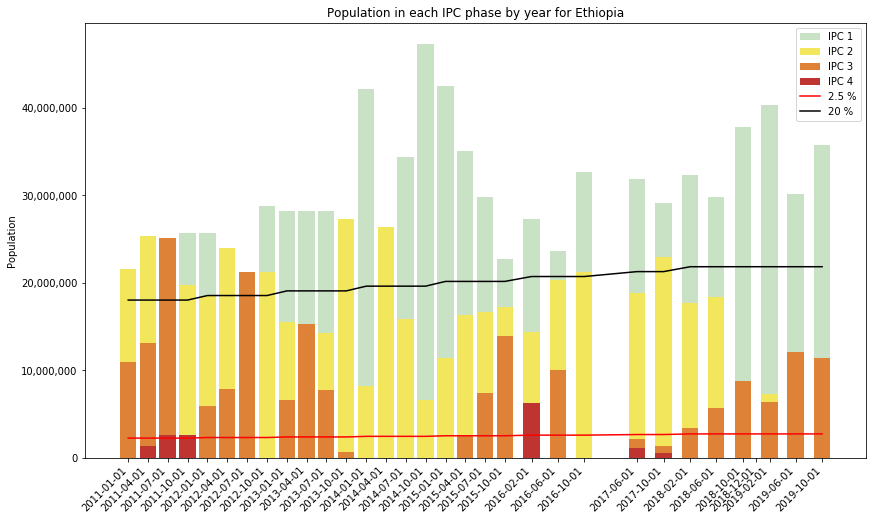

In [118]:
color_map = {1:'#C9E1C5', 2:'#F2E65D', 3:'#DD8236', 4:'#BD3430', 5:'#551010', 99: '#CCCCCC'}
fig, ax = plt.subplots(figsize=(14,8))
pd.set_option('display.float_format', lambda x: '%.3f' % x)
width=75
p1 = plt.bar(grouped['date'].loc[grouped['CS']==1], grouped['Total'].loc[grouped['CS']==1], width=width, color=color_map[1])
p2 = plt.bar(grouped['date'].loc[grouped['CS']==2], grouped['Total'].loc[grouped['CS']==2], width=width, color=color_map[2])
p3 = plt.bar(grouped['date'].loc[grouped['CS']==3], grouped['Total'].loc[grouped['CS']==3], width=width, color=color_map[3])
p4 = plt.bar(grouped['date'].loc[grouped['CS']==4], grouped['Total'].loc[grouped['CS']==4], width=width, color=color_map[4])
p5 = plt.plot(total_pop['date'], total_pop['perc_2_5'], color='red')
p6 = plt.plot(total_pop['date'], total_pop['perc_20'], color='black')


plt.ylabel('Population')
plt.title('Population in each IPC phase by year for Ethiopia')
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('IPC 1', 'IPC 2', 'IPC 3', 'IPC 4', '2.5 %', '20 %'))

plt.xticks(grouped['date'].unique(), rotation=45, ha="right")

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


plt.show()

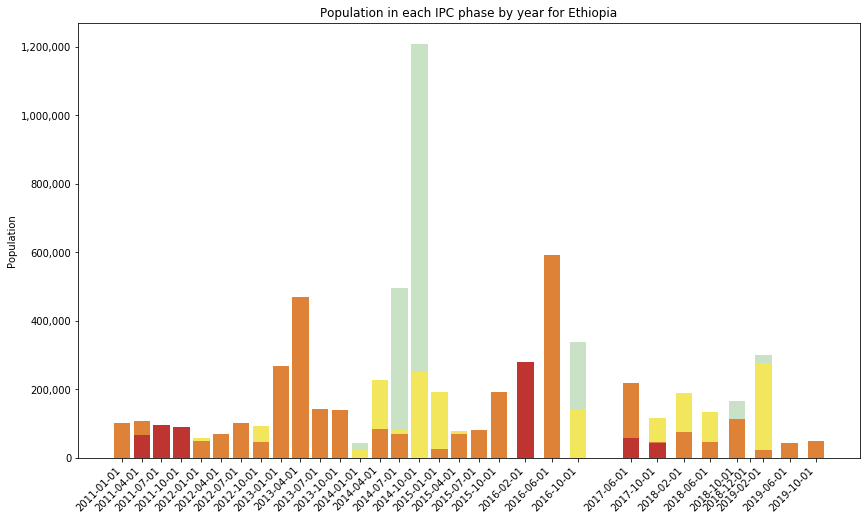

In [53]:
color_map = {1:'#C9E1C5', 2:'#F2E65D', 3:'#DD8236', 4:'#BD3430', 5:'#551010', 99: '#CCCCCC'}
fig, ax = plt.subplots(figsize=(14,8))
pd.set_option('display.float_format', lambda x: '%.3f' % x)
width=75
grouped=grouped_2
p1 = plt.bar(grouped['date'].loc[grouped['CS']==1], grouped['population'].loc[grouped['CS']==1], width=width, color=color_map[1])
p2 = plt.bar(grouped['date'].loc[grouped['CS']==2], grouped['population'].loc[grouped['CS']==2], width=width,color=color_map[2])
p3 = plt.bar(grouped['date'].loc[grouped['CS']==3], grouped['population'].loc[grouped['CS']==3], width=width,color=color_map[3])
p4 = plt.bar(grouped['date'].loc[grouped['CS']==4], grouped['population'].loc[grouped['CS']==4], width=width,color=color_map[4])
#p5 = plt.plot(total_pop['date'], total_pop['perc_2_5'], color='red')
#p6 = plt.plot(total_pop['date'], total_pop['perc_20'], color='black')


plt.ylabel('Population')
plt.title('Population in each IPC phase by year for Ethiopia')
#plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('IPC 1', 'IPC 2', 'IPC 3', 'IPC 4', '2.5 %', '20 %'))

plt.xticks(grouped['date'].unique(), rotation=45, ha="right")

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


plt.show()

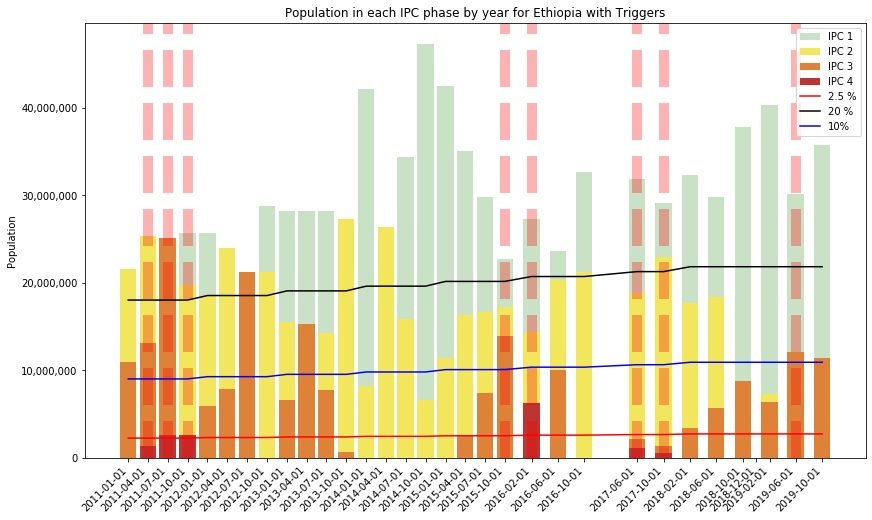

In [119]:
thresholds = ['2011-04-01', '2011-07-01', '2011-10-01', '2015-10-01','2016-02-01',
              '2017-06-01', '2017-10-01','2019-06-01']
color_map = {1:'#C9E1C5', 2:'#F2E65D', 3:'#DD8236', 4:'#BD3430', 5:'#551010', 99: '#CCCCCC'}
fig, ax = plt.subplots(figsize=(14,8))
pd.set_option('display.float_format', lambda x: '%.3f' % x)
width=75
for t in thresholds:
    plt.axvline(pd.to_datetime(t), color='red', lw=10, ls='--', alpha=0.3)
p1 = plt.bar(grouped['date'].loc[grouped['CS']==1], grouped['Total'].loc[grouped['CS']==1], width=width, color=color_map[1])
p2 = plt.bar(grouped['date'].loc[grouped['CS']==2], grouped['Total'].loc[grouped['CS']==2], width=width, color=color_map[2])
p3 = plt.bar(grouped['date'].loc[grouped['CS']==3], grouped['Total'].loc[grouped['CS']==3], width=width, color=color_map[3])
p4 = plt.bar(grouped['date'].loc[grouped['CS']==4], grouped['Total'].loc[grouped['CS']==4], width=width, color=color_map[4])
p5 = plt.plot(total_pop['date'], total_pop['perc_2_5'], color='red')
p6 = plt.plot(total_pop['date'], total_pop['perc_20'], color='black')
p7 = plt.plot(total_pop['date'], total_pop['perc_10'], color='blue')


plt.ylabel('Population')
plt.title('Population in each IPC phase by year for Ethiopia with Triggers')
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0]), 
           ('IPC 1', 'IPC 2', 'IPC 3', 'IPC 4', '2.5 %', '20 %', '10%'))

plt.xticks(grouped['date'].unique(), rotation=45, ha='right')

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#ax.ticklabel_format(useOffset=False)

plt.show()

In [ ]:
# BACKUPS

In [47]:
combined = combined.merge(eth_pop[['admin2Name_en', 'Total']], how='left', left_on='ADMIN2', right_on='admin2Name_en')
combined.head()

,FNID,EFF_YEAR,COUNTRY,ADMIN0,ADMIN1,ADMIN1FR,ADMIN1SP,ADMIN1PT,ADMIN2,ADMIN2FR,ADMIN2SP,ADMIN2PT,ALIASES,geometry,index_right,CS,HA0,date,admin2Name_en,Total
0,ET2014A20722,2014,ET,Ethiopia,SNNPR,None,None,None,Segen,None,None,None,None,"POLYGON ((37.00893 5.20392, 37.00860 5.21044, ...",205,2.0,1.0,2018-06-01,NaN,NaN
1,ET2014A20722,2014,ET,Ethiopia,SNNPR,None,None,None,Segen,None,None,None,None,"POLYGON ((37.00893 5.20392, 37.00860 5.21044, ...",28,3.0,NaN,2012-01-01,NaN,NaN
2,ET2014A20722,2014,ET,Ethiopia,SNNPR,None,None,None,Segen,None,None,None,None,"POLYGON ((37.00893 5.20392, 37.00860 5.21044, ...",241,2.0,0.0,2019-06-01,NaN,NaN
3,ET2014A20722,2014,ET,Ethiopia,SNNPR,None,None,None,Segen,None,None,None,None,"POLYGON ((37.00893 5.20392, 37.00860 5.21044, ...",27,2.0,NaN,2012-01-01,NaN,NaN
4,ET2014A20722,2014,ET,Ethiopia,SNNPR,None,None,None,Segen,None,None,None,None,"POLYGON ((37.00893 5.20392, 37.00860 5.21044, ...",74,2.0,0.0,2013-07-01,NaN,NaN


In [76]:
# Cleaning up and grouping by date and IPC level for plotting

In [48]:
converted = combined[['ADMIN0', 'ADMIN1', 'ADMIN2','Total','date','CS', 'geometry']]
converted = converted.drop_duplicates()
converted = converted.loc[converted['ADMIN2'].astype(str)!='nan']
grouped = converted[['date', 'CS', 'Total']].groupby(['date', 'CS']).agg('sum').reset_index()

In [77]:
# Plotting of IPC phases by year and population count 

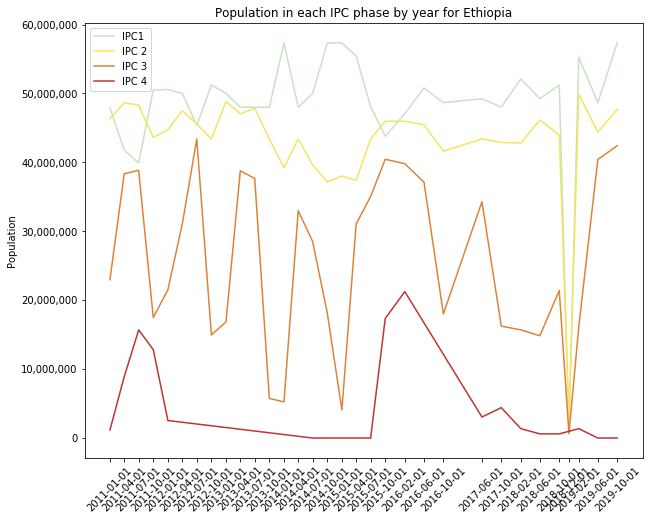

In [68]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
color_map = {1:'#C9E1C5', 2:'#F2E65D', 3:'#DD8236', 4:'#BD3430', 5:'#551010', 88: '#CCCCCC'}
fig, ax = plt.subplots(figsize=(10,8))
width=75
p1 = plt.plot(grouped['date'].loc[grouped['CS']==1], grouped['Total'].loc[grouped['CS']==1], color=color_map[1])
p2 = plt.plot(grouped['date'].loc[grouped['CS']==2], grouped['Total'].loc[grouped['CS']==2], color=color_map[2])
p3 = plt.plot(grouped['date'].loc[grouped['CS']==3], grouped['Total'].loc[grouped['CS']==3], color=color_map[3])
p4 = plt.plot(grouped['date'].loc[grouped['CS']==4], grouped['Total'].loc[grouped['CS']==4], color=color_map[4])

plt.ylabel('Population')
plt.title('Population in each IPC phase by year for Ethiopia')
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('IPC1', 'IPC 2', 'IPC 3', 'IPC 4', 'IPC 4'))

plt.xticks(grouped['date'].unique(), rotation=45)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

In [79]:
# ethiopia population by district
# defining the drought events
# threshold test
# food prices
grouped_2.loc[grouped_2['ADMIN2']=='Agniwak']

,date,CS,ADMIN2,area,Total
0,2011-01-01,1.000,Agniwak,1.905,nan
45,2011-01-01,2.000,Agniwak,1.905,nan
111,2011-01-01,3.000,Agniwak,1.905,nan
156,2011-04-01,1.000,Agniwak,1.905,nan
200,2011-04-01,2.000,Agniwak,1.905,nan
...,...,...,...,...,...
4769,2019-06-01,1.000,Agniwak,1.905,nan
4888,2019-06-01,3.000,Agniwak,1.905,nan
4948,2019-10-01,1.000,Agniwak,1.905,nan
5017,2019-10-01,2.000,Agniwak,1.905,nan
